# Assignment 1

This assignment has 3 parts. The evaluation of this assignment will be performed as an overall review of the hand-in, by your TA. To pass the assignment, the TA must be convinced that you have understood all portions of the curriculum which are covered by the assignment.

We expect you to hand in individual assignments, but you are allowed to discuss the questions with each other. This means that you need to write your own answers, and your own, personal code, for all questions.

Besides getting the correct answers, solutions will also be judged based on clarity, efficiency and brevity. 

The assignment is due on Thursday 5th of October, at 11 pm. We expect each student to upload a pdf of their answers (written in whatever language your TA can read). When preparing the document, please follow these guidelines:

Format the code as a jupyter notebook, and export this to pdf. If you work in google colab, the easiest solution seems to be to download the notebook after running it, and exporting to pdf on your own computer.
Remember to include comments in your code.
Name the file as 'firstname_lastname_auID.pdf' (eg. 'kaare_mikkelsen_au123456.pdf')
To make our expectations clear, see this dummy example of an assignment: <a href="https://brightspace.au.dk/content/enforced/108586-LR25340/dummyAssignment.pdf?_&d2lSessionVal=qnWWoiztGzYsK7oElSxZuvXu7"> dummyAssignment.pdf</a>

When preparing your notebook, you may assume that the data files accompanying this assignment are placed in the same folder as the script.

### Part 1:

In your own words, answer the following questions:

a: In your opinion, what were the most important turning points in the history of deep learning?

b: Explain the ADAM optimizer.

c: Assume data input is a single 30x40 pixel image. First layer is a convolutional layer with 5 filters, with kernel size 3x2, step size (1,1) and padding='valid'. What are the output dimensions?

d: Assuming ReLU activations and offsets, and that the last layer is softmax, how many parameters does this network have: 

<img src="data/image.png" width="400"/>

e: For a given minibatch, the targets are [1,4, 5, 8] and the network output is [0.1,4.4,0.2,10]. If the loss function is "torch.nn.HuberLoss(reduction='mean', delta=1.0)", what is the loss for this minibatch?

**Answers:**

a) The most important turning points in the history of deep learning are probably a collection of many things. But if I have to pick some of the most important things in my opinion, I would say that backpropagation is the first one, allowing us the train deep networks in the first place. And ReLU allowed us to train deep networks without vanishing gradients, which we would get if we use sigmoid or tanh. Then we have some models that demonstrated the geatness of deep learning, such as, AlexNet (image recognition) which uses convolutional neural networks. Generative Advessarial Networks (GANs) which can generate images. AlphaGo (game playing) which can beat the best human players in the world. Transformers, which is used for natural language processing, is also a very important model. But most of all, a huge contribution to deep learning is the availability of data and the gpu computational power.

<div style="padding: 20px;"></div>

b) The ADAM (Adaptive Moment Estimation) optimizer is an extension of the stochastic gradient descent (SGD) method, and it combines ideas from two other optimization algorithms: AdaGrad and RMSProp.

Here's a step-by-step breakdown of how ADAM works:

1. **Initialization**:
   - Define two variables, $m$ and $v$, both initialized as zero vectors. $m$ will keep track of the first moment (mean) of the gradient, and $v$ will keep track of the second moment (uncentered variance).

2. **Compute Gradient**:
   - Calculate the gradient $g$ of the loss with respect to the parameters.
      - $g = \nabla_\theta J(\theta)$

3. **Update Biased First and Second Moment**:
   - $m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g$
   - $v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g^2$
   
   Here, $\beta_1$ and $\beta_2$ are hyperparameters that control the exponential decay rates. Typically, $\beta_1$ is set close to 1 (e.g., 0.9) and $\beta_2$ is set even closer to 1 (e.g., 0.999).

4. **Bias Correction**:
   - Since $m$ and $v$ are initialized as zero vectors, they will be biased toward zero as both $\beta_1$ and $\beta_2$ $\approx 1$.
   - To correct for the initialization bias (since $m$ and $v$ were initialized at zero), ADAM includes a bias correction step:
     - $\hat{m_t} = \frac{m_t}{1 - \beta_1^t}$
     - $\hat{v_t} = \frac{v_t}{1 - \beta_2^t}$

5. **Update Parameters**:
   - $\theta_{t+1} = \theta_t - \frac{\alpha \cdot \hat{m_t}}{\sqrt{\hat{v_t}} + \epsilon}$
   
   Here, $\theta$ represents the model's parameters weights and biases ($w, b$), $\alpha$ is the learning rate, and $\epsilon$ is a small constant (e.g., $10^{-7}$) added for numerical stability to prevent division by zero. And $L$ is the loss function.

Some of the reasons for ADAM's popularity include:
- It requires minimal tuning of the learning rate $\alpha$ compared to other optimizers.
- It uses moving averages of the parameters (momentum) which can help navigate the optimization landscape (when the gradient would othrwise be close to zero), thus speeding up the convergence.
- It scales the learning rate for each parameter individually, which can be beneficial when dealing with sparse data or large models.

<div style="padding: 20px;"></div>

c) Given that we have:

- Input size: 30×40
- Kernel size: 3×2
- Stride: 1,1
- Padding: 'valid' (which means no padding)

We have the formula for calculating the output size of a convolutional layer as: 


\begin{align*}
   \text{Output} = \left((W - K + 2P)//S \right) + 1,
\end{align*}

where W is the input volume, K is the size of the kernel, P is the padding and S is the stride. Here '//' is the floor division, giving the 'lower' integer value of the division.

Thus we get that the output size is:

\begin{align*}
   \text{Output rows} &= \left((30 - 3 + 2*0)//1 \right) + 1 = 28 \\
   \text{Output columns} &= \left((40 - 2 + 2*0)//1 \right) + 1 = 39 
\end{align*}

So output size is [5, 28, 39], since we applied 5 filters in the first layer.

<div style="padding: 20px;"></div>

d) Given the network described above. We know that the relu takes an aggregation of the input values (weights and biases) and outputs 0 is the aggregation is negative, and if the aggregation is positive, it outputs the aggregation. And the softmax also takes an aggregation of the inputs, but returns a value between 0 and 1.

So given the above, to calculate the number of parameters, we need to calculate how many weights and biases we have in the network. So starting from the second layer (first hidden layer), since 1 neuron of this layer takes a weighted aggregation of all the input neurons plus a bias, we can say that the number of parameters for eac layer, starting from the second is, number of neurons in the previuous layer, times the number of neurons in the current layer, plus the number of neurons in the current layer. More formally:

$w = l_{t-1} * l_{t}$, $b = l_{t}$, where $l_{t-1}$ is the number of neurons in the previous layer, and $l_{t}$ is the number of neurons in the current layer. Thus giving us the total number of parameters in that layer as $w + b$.

Thus we get that our network above has (since it is fully connected):

 - Weights: $(5 * 5) + (5 * 5) + (5 * 5) + (5 * 3) = 90$
 - Biases: $5 + 5 + 5 + 3 = 18$

Giving us the total number of parameters as $90 + 18 = 108$.

<div style="padding: 20px;"></div>

e) From <a href="https://pytorch.org/docs/stable/generated/torch.nn.HuberLoss.html"> pytorch's website</a>, we have the following describtion of the function:

For a batch of size $N$, the unreduced loss can be described as:
$$
\ell(x, y)=L=\left\{l_1, \ldots, l_N\right\}^T
$$
with
$$
l_n= \begin{cases}0.5\left(x_n-y_n\right)^2, & \text { if }\left|x_n-y_n\right|<\text { delta } \\ \text { delta } *\left(\left|x_n-y_n\right|-0.5 * \text { delta }\right), & \text { otherwise }\end{cases}
$$
If reduction is not none, then:
$$
\ell(x, y)= \begin{cases}\operatorname{mean}(L), & \text { if reduction }=\text { 'mean'; } \\ \operatorname{sum}(L), & \text { if reduction = 'sum' }\end{cases}
$$

<div style="padding: 5px;"></div>

Thus given the thier describtion of their function, we have that $\ell(x, y) = \ell([1,4, 5, 8], [0.1,4.4,0.2,10]) = L$, reduction is 'mean' and delta is 1.0. So we get that:

\begin{align*}
   l_1 &= | 1 - 0.1 | = 0.9 < 1 \\
   l_2 &= | 4 - 4.4 | = 0.4 < 1 \\
   l_3 &= | 5 - 0.2 | = 4.8 \not< 1 \\
   l_4 &= | 8 - 10 | = 2 \not< 1 \\
\end{align*}

Thus givimg us:

\begin{align*}
   l_1 &= 0.5 * (1 - 0.1)^2 = 0.405 \\
   l_2 &= 0.5 * (4 - 4.4)^2 = 0.08 \\
   l_3 &= 1 * (|5 - 0.2| - 0.5 * 1) = 4.3 \\
   l_4 &= 1 * (|8 - 10| - 0.5 * 1) = 1.5 \\
\end{align*}

And finally, we get the loss, as he mean of the above, which is:

\begin{align*}
   L &= \frac{0.405 + 0.08 + 4.3 + 1.5}{4} = 1.57125
\end{align*}

And below, we show that the above is correct, by using pytorch's implementation of the Huber loss function.


In [1]:
import torch
import torch.nn as nn

# Given targets and network output
targets = torch.tensor([1, 4, 5, 8], dtype=torch.float32)
network_output = torch.tensor([0.1, 4.4, 0.2, 10], dtype=torch.float32)

# Compute HuberLoss
huber_loss = nn.HuberLoss(reduction='mean', delta=1.0)
loss_value = huber_loss(network_output, targets)
loss_value.item()

1.571250081062317

### Part 2: Writing a PyTorch dataset 
The Insects.zip-file contains images of three species of bees. The Insects.csv -file has three columns of which you should focus on the one named "species" and the one named "filename". The "species" column tells the target label of the images listed in the "filename" column.

Your task is to write a PyTorch dataset, which provides image samples together with their target labels.

I.e.,

<image data from 1_003311_1_2020_05_09-14-21-01-479.jpg>,  Andrena fulva <br>
<image data from 1_206320_1_2020_03_04-11-17-03-984.jpg>,  Panurgus banksianus <br>
<image data from 2_208265_1_2020_03_07-10-34-31-425.jpg>,  Lasioglossum punctatissimum <br>

...

insects.csv (in data folder)

Insects.zip (in data folder)

You can  read more about datasets in PyTorch here:

* <a href="https://pytorch.org/tutorials/beginner/basics/data_tutorial.html"> Data tutorial</a> <br>
* <a href="https://medium.com/analytics-vidhya/creating-a-custom-dataset-and-dataloader-in-pytorch-76f210a1df5d"> Creating a custom Dataset and Dataloader in Pytorch</a> <br>

You can use the following python-script to test your dataset: <br>
dataset_tester.py (in data folder)

In [32]:
import os
import pandas as pd
from torchvision.io import read_image
from torchvision import transforms
from torch.utils.data import Dataset

class InsectsDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.insects_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.insects_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.insects_frame.iloc[idx, 2])  # Assuming filename is in the second column
        image = read_image(img_name)  # Using torchvision.io to read the image
        species = self.insects_frame.iloc[idx, 1]  # Assuming species is in the first column

        # Transform picture to correct size
        if self.transform:
            image = self.transform(image)

        return [image, species]


# Make a conditional transform to tensor (since we ue torchvision.io to read the image, it will already be a tensor)
class ConditionalToTensor(transforms.ToTensor):
    def __call__(self, pic):
        if isinstance(pic, torch.Tensor):
            return pic
        return super().__call__(pic)

In [33]:
# Define a basic transform to convert the images to PyTorch tensors
transform = transforms.Compose([
    transforms.Resize((128, 128)), # Resize images for demonstration purposes
    ConditionalToTensor() # Checks if the input is a tensor before converting it
])

csv_file='./data/Insects.csv'
Image_folder='./data/Insects/'

# Create an instance of the dataset
insects_dataset = InsectsDataset(csv_file=csv_file, root_dir=Image_folder, transform=transform)

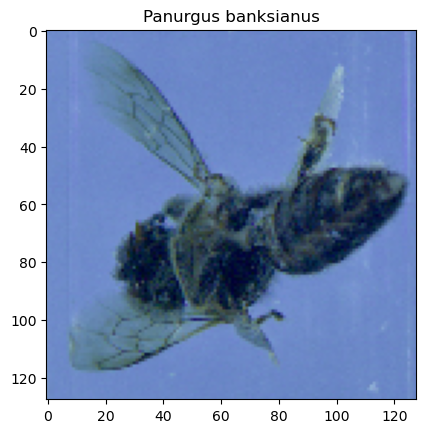

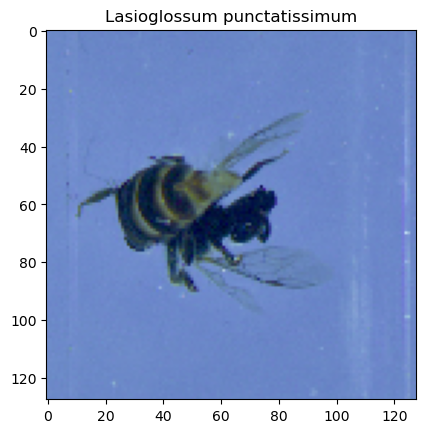

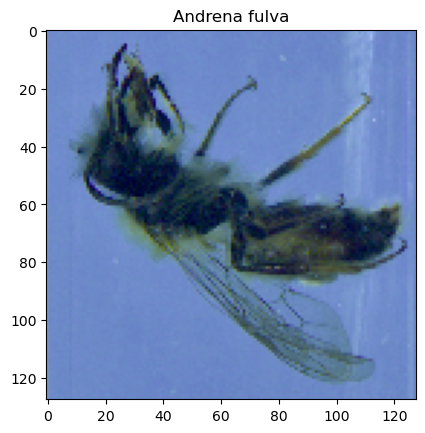

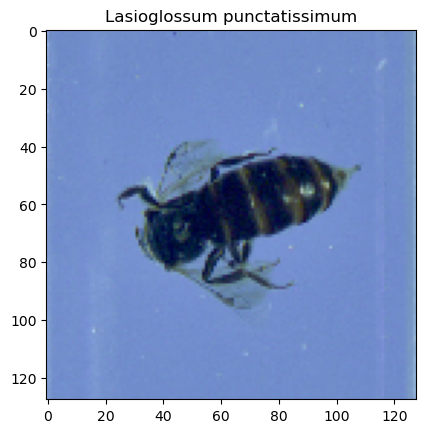

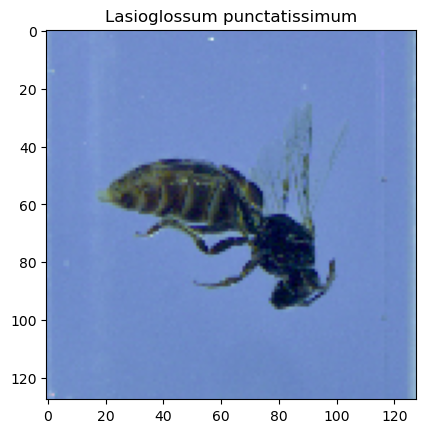

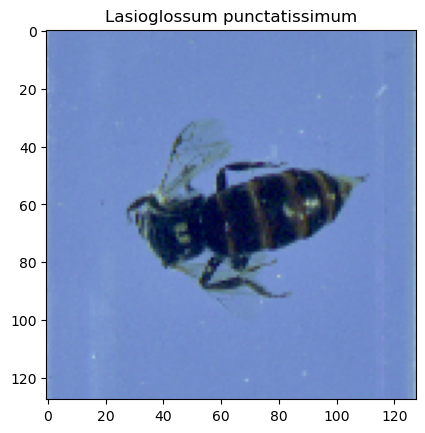

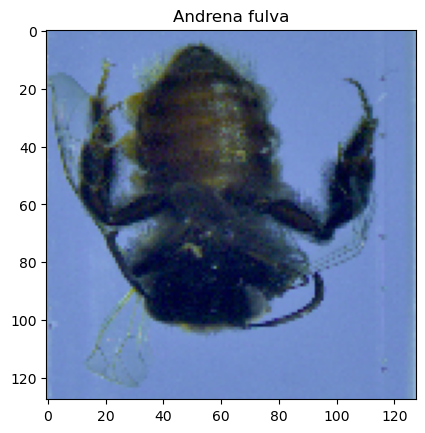

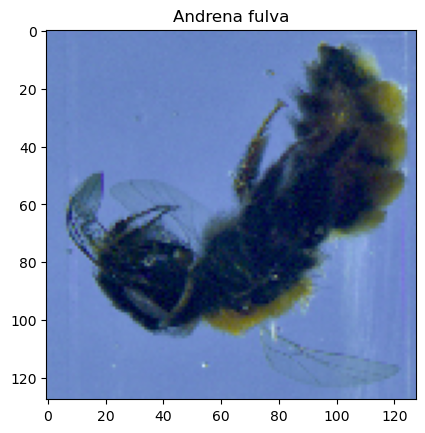

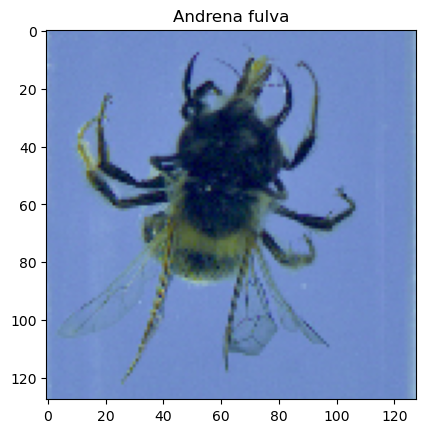

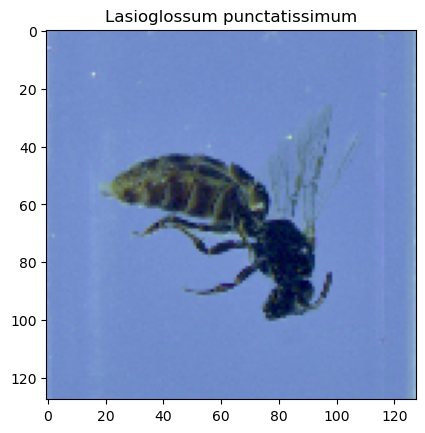

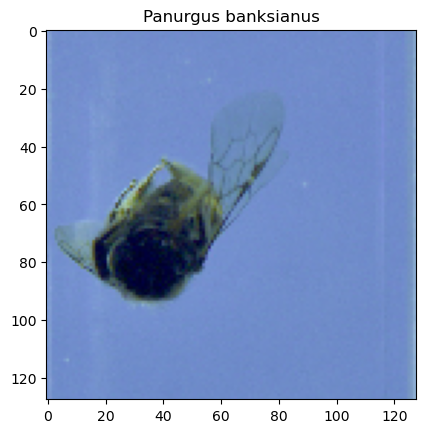

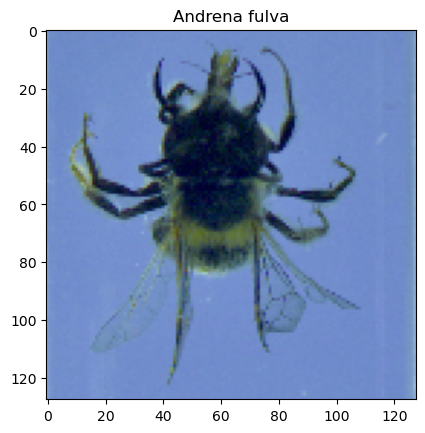

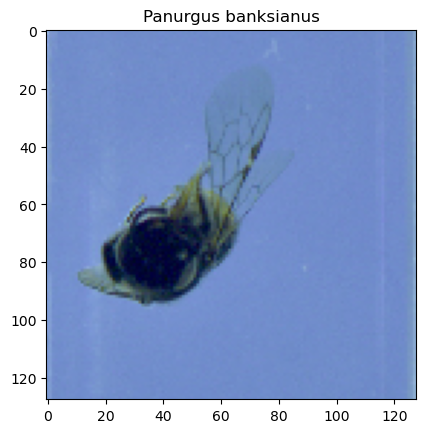

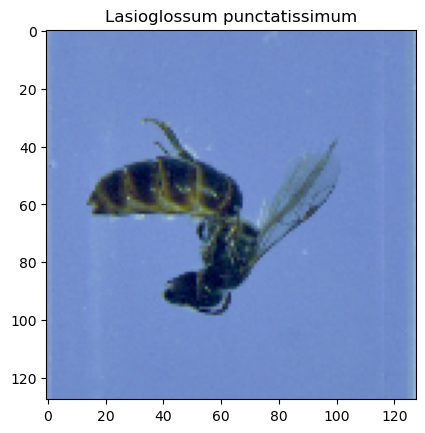

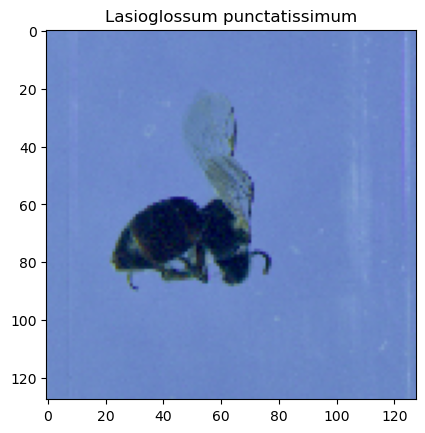

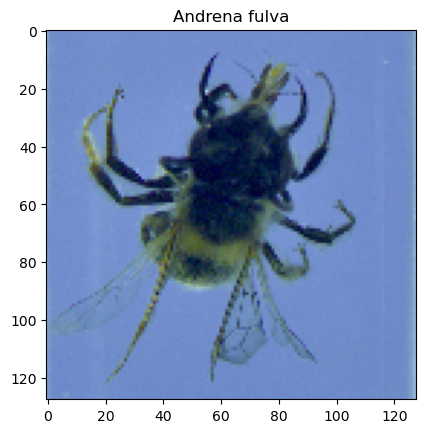

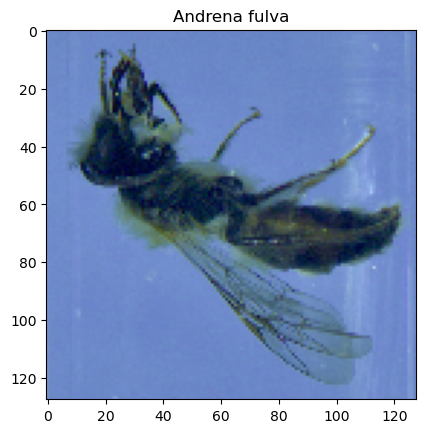

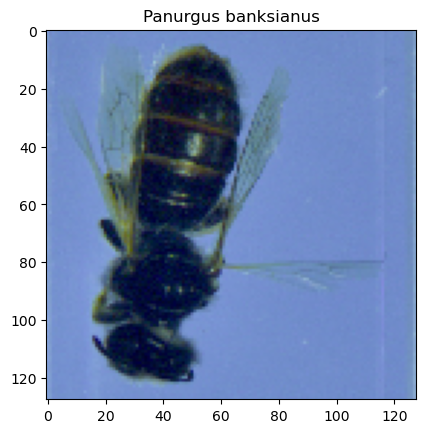

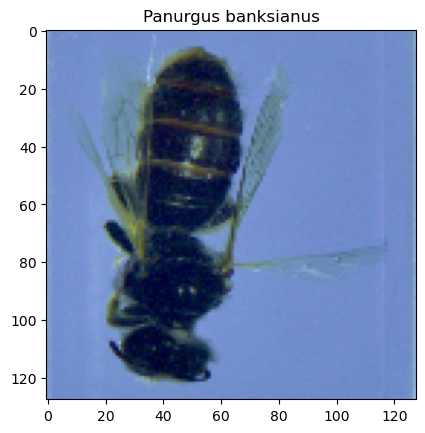

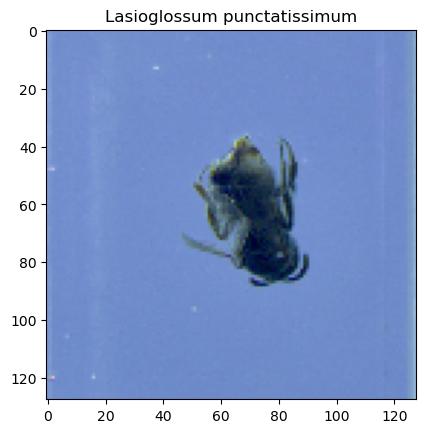

In [44]:
# For multiprocessing to work, the code needs to be in a separate .py file and we need to run it with the __name__ == '__main__' check for Windows

# Load the multiprocessing library DataLoader, and make it reloadable for devolopment purposes
import data.Custom_DataLoader
from importlib import reload
reload(data.Custom_DataLoader)
from data.Custom_DataLoader import custom_dataLoader

if __name__ == '__main__':
    # Call the dataloader function
    custom_dataLoader()

### Part 3: 

We supply two datasets, with points drawn from a 2D feature space, and a label assigned to each data point. The data has already been assigned to train and test sets. Each file is a table, where first column is the label, and the 2nd and 3rd columns are the features. This exercise does not require a gpu.  
<a href="https://brightspace.au.dk/content/enforced/71450-LR13847/trainData.txt?_&d2lSessionVal=fiCloN6ebLkr3R9rOFtxERQns&_&d2lSessionVal=fiCloN6ebLkr3R9rOFtxERQns&_&d2lSessionVal=mlX0kjzvB1L2eHxxCsdh6ks5j"> trainData</a>, <a href="https://brightspace.au.dk/content/enforced/71450-LR13847/testData.txt?_&d2lSessionVal=fiCloN6ebLkr3R9rOFtxERQns&_&d2lSessionVal=fiCloN6ebLkr3R9rOFtxERQns&_&d2lSessionVal=mlX0kjzvB1L2eHxxCsdh6ks5j"> testData</a> <br>

a: describe & visualize the data

b: design a neural network using pytorch to correctly assign labels 

* Describe your network

* Describe your training strategy

* Describe your results and discuss the observed performance

* Visualize network performance similar to:
---------------------------------------------------------

model= #trained pytorch network

import numpy as np  
import matplotlib.pyplot as plt  
model.cpu()  
x,y=np.meshgrid(np.linspace(-1,1,30),np.linspace(-1,1,30))  
xy=np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)  
z=model(torch.tensor(xy).float()).detach().numpy()  
z=np.argmax(z,1).reshape(30,30)  
plt.contourf(x,y,z)  
plt.scatter(trainX[:,0],trainX[:,1],c=trainLabels)  

---------------------------------------------------------

**Answers:** </br>
a)

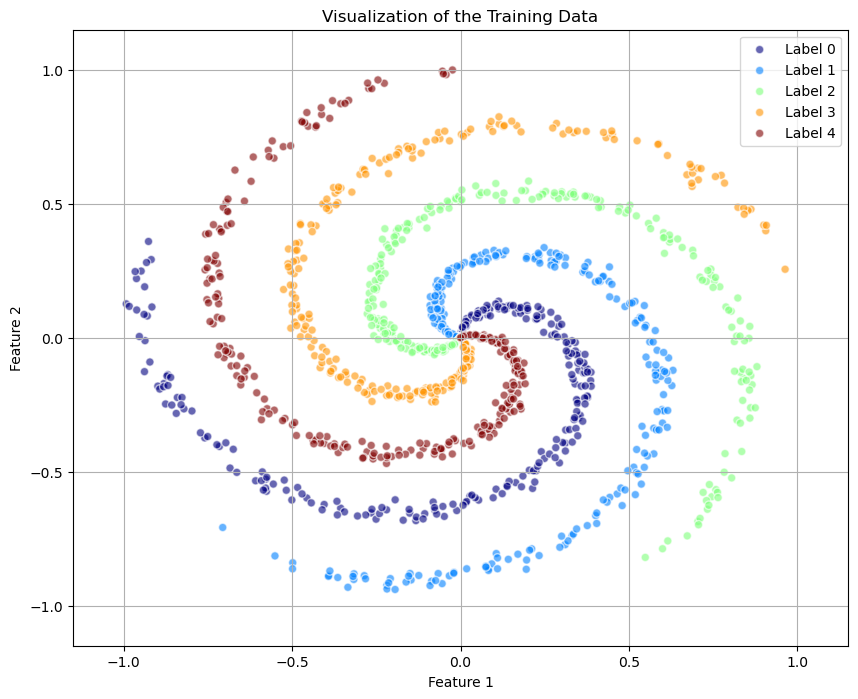

In [229]:
# import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
train_data = pd.read_csv('./data/trainData.txt', header=None, delim_whitespace=True, names=['label', 'feature1', 'feature2'])
test_data = pd.read_csv('./data/testData.txt', header=None, delim_whitespace=True, names=['label', 'feature1', 'feature2'])

# Define a normalization based on label values (for plotting purposes)
norm = plt.Normalize(train_data['label'].min(), train_data['label'].max())

# Visualize the data
plt.figure(figsize=(10, 8))
for label in sorted(train_data['label'].unique()):
    subset = train_data[train_data['label'] == label]
    plt.scatter(subset['feature1'], subset['feature2'], norm=norm, c=subset['label'], cmap="jet", label=f'Label {int(label)}', alpha=0.6, edgecolors='w')
    
plt.title('Visualization of the Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-1.15, 1.15)
plt.ylim(-1.15, 1.15)
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

It looks like we have some data in a 2D space, where we have 5 clusters and where all the clusters go in a spiral, meet in a center point (0, 0). While going out from the center, then each cluster is spread more apart from each other, however the points within a cluster are still relatively close to each other, but we observe fewer observations in the tails of the clusters.

b)  

**1. Describe your network:** We will design a simple feedforward neural network. Given that we have a 2D input space, the input layer will have 2 nodes. We'll include two hidden layers with a ReLU activation function, one starting with 64 neurons and one layer with 32 neurons, making the network very wide and non-linear, thus making our model very flexible to understand the input. The output layer will have as many nodes as there are unique labels in the dataset (which is 5) and we will use a linear connection to all the nodes, to provide class probabilities (just not between 0 and 1) (Such that is sort of mathces what we have worked with above in part 1). The reason why we don't use a softmax activation function in the output layer, is because we will use the cross-entropy loss function, which expects the output of the network to be logits (unnormalized log probabilities). And because the cross-entropy loss function applies the softmax function for us, therefor we would only skew the softmax results, and we therefor don't need to apply it in the output layer.

**2. Describe your training strategy:** We'll use the Adam optimizer, as we described above. For the loss function, I'll use the cross-entropy loss, which is suitable for multi-class classification tasks. The network will be trained using mini-batch gradient descent.  

Let's start by preparing the data and defining the neural network model.

In [230]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

# Extracting features and labels from the dataframe
trainX = train_data[["feature1", "feature2"]].values
trainLabels = train_data["label"].values.astype(int)
testX = test_data[["feature1", "feature2"]].values
testLabels = test_data["label"].values.astype(int)

# Convert them to PyTorch tensors
trainX_tensor = torch.tensor(trainX, dtype=torch.float32)
trainLabels_tensor = torch.tensor(trainLabels, dtype=torch.int64)
testX_tensor = torch.tensor(testX, dtype=torch.float32)
testLabels_tensor = torch.tensor(testLabels, dtype=torch.int64)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(SimpleNN, self).__init__()

        # Hidden Layer 1
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        # Hidden Layer 2
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # Output Layer
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define network dimensions
input_dim = trainX.shape[1]
hidden_dim1 = 64
hidden_dim2 = 32
output_dim = len(np.unique(trainLabels))

# Instantiate the model
model = SimpleNN(input_dim, hidden_dim1, hidden_dim2, output_dim)

model


SimpleNN(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=5, bias=True)
)

The designed neural network consists of:

- An input layer that takes the 2D feature data.
- A hidden layer with 64 neurons and a ReLU activation function.
- A hidden layer with 32 neurons and a ReLU activation function.
- An output layer with 5 neurons (corresponding to the five unique labels) that produces logits (probabilities) for each class.  

**Training Strategy:**
Now, we will train this model using the following strategy:

- Loss Function: Cross-Entropy Loss (because it's a classification problem with multiple classes).
- Optimizer: Adam optimizer.
- Epochs: We will train for a predefined number of epochs, checking the accuracy on the test set to avoid overfitting.
- Batch Size: 50.
- Save the best model with the lowest test loss.

In [235]:
def k_fold_split(dataset, k_folds=5):
    
    # Shuffle dataset indices
    indices = torch.randperm(len(dataset))
    
    # Split indices into k chunks/folds
    return [indices[i::k_folds] for i in range(k_folds)]

FOLD 1
Epoch [50/500], Train Loss: 0.0250, Val Loss: 0.0381, Learning Rate: 0.0070
Epoch [100/500], Train Loss: 0.0169, Val Loss: 0.0389, Learning Rate: 0.0049
Early stopping on epoch 146
FOLD 2
Epoch [50/500], Train Loss: 0.0385, Val Loss: 0.0564, Learning Rate: 0.0070
Epoch [100/500], Train Loss: 0.0220, Val Loss: 0.0324, Learning Rate: 0.0049
Epoch [150/500], Train Loss: 0.0189, Val Loss: 0.0282, Learning Rate: 0.0034
Early stopping on epoch 156
FOLD 3
Epoch [50/500], Train Loss: 0.0387, Val Loss: 0.0245, Learning Rate: 0.0070
Epoch [100/500], Train Loss: 0.0286, Val Loss: 0.0263, Learning Rate: 0.0049
Epoch [150/500], Train Loss: 0.0157, Val Loss: 0.0055, Learning Rate: 0.0034
Epoch [200/500], Train Loss: 0.0382, Val Loss: 0.0182, Learning Rate: 0.0024
Epoch [250/500], Train Loss: 0.0276, Val Loss: 0.0047, Learning Rate: 0.0017
Early stopping on epoch 270
FOLD 4
Epoch [50/500], Train Loss: 0.0415, Val Loss: 0.0640, Learning Rate: 0.0070
Epoch [100/500], Train Loss: 0.0213, Val Loss

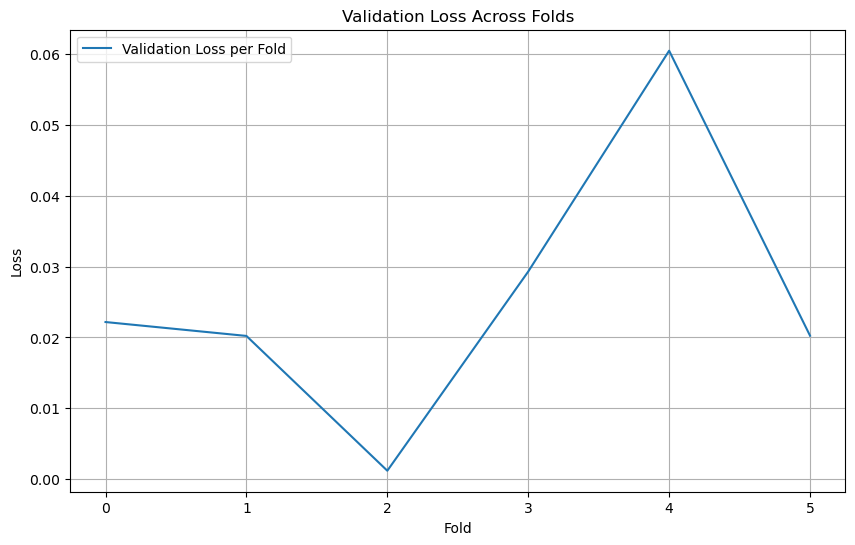

In [265]:
from torch.utils.data import Subset, DataLoader, TensorDataset

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Lists to keep track of training and validation losses
train_losses = []
test_losses = []

# Parameters
batch_size = 50
epochs = 500
k_folds = 6
early_stop_epochs = 30  # Number of epochs to wait before stopping if no improvement in validation loss

# Convert the training data into a TensorDataset and use DataLoader for minibatch handling
train_dataset = TensorDataset(trainX_tensor, trainLabels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Lists to keep track of training and validation losses across folds
all_train_losses = []
all_val_losses = []

best_val_loss = float('inf')
best_model_weights = None
fold_val_losses = []

# Get the k-fold split indices
k_fold_indices = k_fold_split(train_dataset, k_folds)

# A list to store the best model weights for each fold
best_weights_per_fold = []

for fold, val_indices in enumerate(k_fold_indices):
    print(f"FOLD {fold + 1}")
    
    # Create training indices by excluding the validation indices
    train_indices = [i for i in range(len(train_dataset)) if i not in val_indices]
    
    # Create training and validation subsets
    train_subset = Subset(train_dataset, train_indices)
    val_subset = Subset(train_dataset, val_indices)
    
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    
    # Reset the learning rate for each fold
    lr = 0.01

    # Reset the model and optimizer for each fold
    model = SimpleNN(input_dim, hidden_dim1, hidden_dim2, output_dim)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    train_losses = []
    val_losses = []
    early_stop_counter = 0
    fold_best_val_loss = float('inf')
    
    for epoch in range(epochs):
        # Training loop
        for batch_X, batch_labels in train_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Training loss for the epoch
        outputs = model(trainX_tensor[train_indices])
        train_loss = criterion(outputs, trainLabels_tensor[train_indices])
        train_losses.append(train_loss.item())
        
        # Validation loop
        with torch.no_grad():
            outputs = model(trainX_tensor[val_indices])
            val_loss = criterion(outputs, trainLabels_tensor[val_indices])
            val_losses.append(val_loss.item())

        # Check early stopping
        if val_loss < fold_best_val_loss:
            fold_best_val_loss = val_loss
            early_stop_counter = 0
            current_best_weights = model.state_dict().copy()
        else:
            early_stop_counter += 1
            if early_stop_counter >= early_stop_epochs:
                print(f"Early stopping on epoch {epoch+1}")
                break
        
        # Print loss every 50 epochs
        if (epoch + 1) % 50 == 0:
            lr = lr * 0.7
            print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Learning Rate: {lr:.4f}')
    
    # Save the best weights for this fold
    best_weights_per_fold.append(current_best_weights)

    # Save the training and validation losses for this fold
    fold_val_losses.append(fold_best_val_loss)
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

# Choose the best model based on average validation loss across folds
best_fold = np.argmin(fold_val_losses)
best_model_weights = best_weights_per_fold[best_fold]

# Plotting the validation loss for each fold
plt.figure(figsize=(10, 6))
plt.plot(fold_val_losses, label="Validation Loss per Fold")
plt.xlabel("Fold")
plt.ylabel("Loss")
plt.title("Validation Loss Across Folds")
plt.legend()
plt.grid(True)
plt.show()


Epoch [50/500], Loss: 0.0432, Test Loss: 0.0442
Epoch [100/500], Loss: 0.0192, Test Loss: 0.0232
Epoch [150/500], Loss: 0.0103, Test Loss: 0.0222
Epoch [200/500], Loss: 0.0108, Test Loss: 0.0255
Epoch [250/500], Loss: 0.0099, Test Loss: 0.0248
Epoch [300/500], Loss: 0.0114, Test Loss: 0.0227
Epoch [350/500], Loss: 0.0069, Test Loss: 0.0186
Epoch [400/500], Loss: 0.0109, Test Loss: 0.0388
Epoch [450/500], Loss: 0.0104, Test Loss: 0.0413
Epoch [500/500], Loss: 0.0594, Test Loss: 0.1151


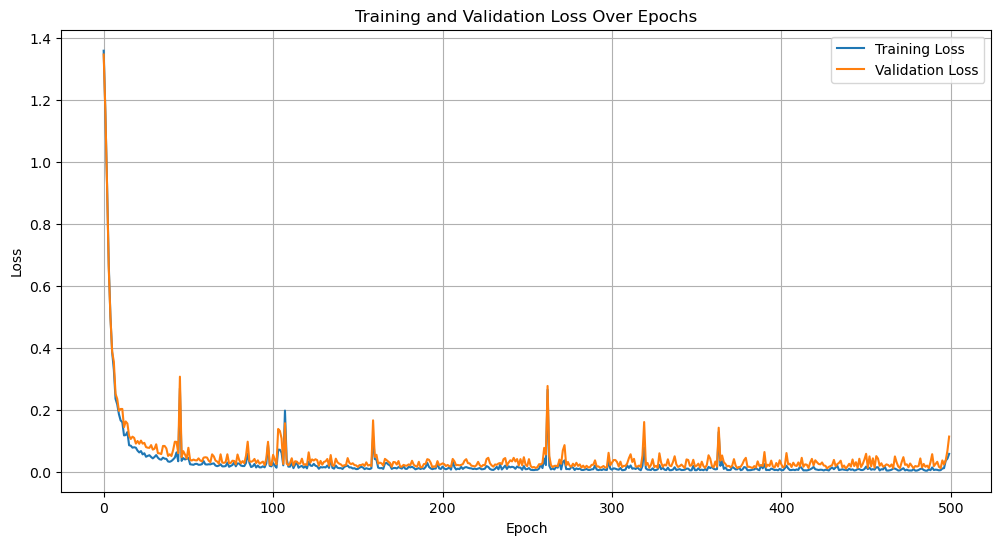

In [231]:
from torch.utils.data import DataLoader, TensorDataset

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Parameters for minibatch training
batch_size = 50  # Size of each minibatch
epochs = 500

# Convert the training data into a TensorDataset and use DataLoader for minibatch handling
train_dataset = TensorDataset(trainX_tensor, trainLabels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Lists to keep track of training and validation losses
train_losses = []
test_losses = []

best_val_loss = float('inf')
best_model_weights = None

# Training loop
for epoch in range(epochs):
    for batch_X, batch_labels in train_loader:

        # Forward pass

        # Compute the model's predictions on the test/validation data.
        # Here, the model processes the train data through our model defined above and returns its predictions.
        outputs = model(batch_X)

        # Compute the loss between the model's predictions and the actual labels in the test/validation data.
        # This gives us an idea of how well the model is predicting on trained data.
        loss = criterion(outputs, batch_labels)
        
        # Backward pass and optimization

        # Zero out the gradients for the optimizer. This prevents accumulation of gradients from previous iterations.
        # In PyTorch, gradients accumulate by default (useful for things like RNNs), so they need to be cleared out 
        # before each new gradient computation.
        optimizer.zero_grad()

        # Compute the gradients for each parameter based on the current loss. 
        # This function backpropagates the error through the network by computing the gradient of the loss with 
        # respect to each (learnable) parameter.
        loss.backward()

        # Update the model's parameters based on the computed gradients. Our model was defined in the previous cell,
        # This step adjusts each parameter (like weights and biases) in the direction that reduces the loss.
        # Here we namely use the ADAM optimizer.
        optimizer.step()
        
    # Training loss
    outputs = model(trainX_tensor)
    loss = criterion(outputs, trainLabels_tensor)

    # Record the training loss
    train_losses.append(loss.item())
    
    # Validation loss

    # `torch.no_grad()` is a context manager that disables gradient computation during inference.
    # Disabling gradient computation is beneficial for evaluation, saves memory, and speeds up the computation.
    # We don't need gradients during validation or testing since we're not updating the model parameters.
    with torch.no_grad():
        
        # Here, the model processes the test data and returns its predictions.
        test_outputs = model(testX_tensor)
        
        # This gives us an idea of how well the model is performing on unseen data.
        test_loss = criterion(test_outputs, testLabels_tensor)
        
        # Record the testing loss
        test_losses.append(test_loss.item())

    # If this is the best model so far, save its weights
    if test_loss < best_val_loss:
        best_val_loss = test_loss
        best_model_weights = model.state_dict().copy()

    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


**3. Describe your results and discuss the observed performance:** 

- Both the training and validation losses have decreased over the epochs, showing that our model is learning.
- The model has not overfitted, as the validation loss is following the same trend as the training loss.
- The final training and validation losses seem reasonably low, suggesting that our model should have decent performance.

**4. Visualize network performance:**
To better understand our model's performance, we'll visualize its predictions on the training data. This will help us visually assess how well our model has learned to separate the different classes.

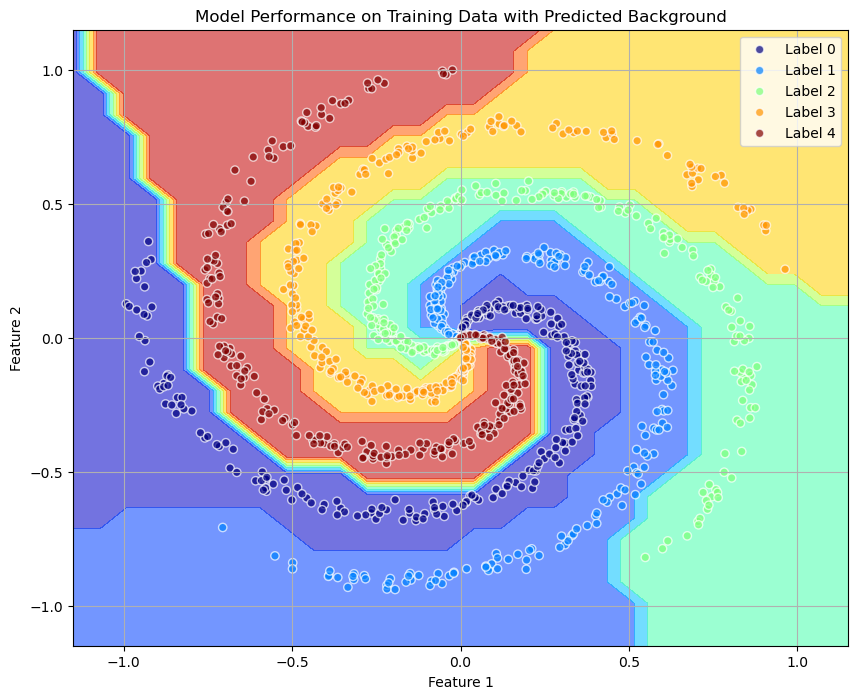

In [266]:
import numpy as np

model.load_state_dict(best_model_weights)

model.cpu()

x,y=np.meshgrid(np.linspace(-1.15,1.15,30),np.linspace(-1.15,1.15,30))
xy=np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
z=model(torch.tensor(xy).float()).detach().numpy()
z=np.argmax(z,1).reshape(30,30)

# Define a normalization based on label values
norm = plt.Normalize(train_data['label'].min(), train_data['label'].max())

# Generate the visualization of the predictions
plt.figure(figsize=(10, 8))
plt.contourf(x, y, z, cmap="jet", alpha=0.55, norm=norm)

# Overlay scatter plot with the true labels
for label in sorted(train_data['label'].unique()):
    subset = train_data[train_data['label'] == label]
    plt.scatter(subset['feature1'], subset['feature2'], label=f'Label {int(label)}', norm=norm, 
                c=subset['label'], cmap="jet",alpha=0.7, edgecolors='w')

# Add legend and text
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-1.15, 1.15)
plt.ylim(-1.15, 1.15)
plt.title("Model Performance on Training Data with Predicted Background")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

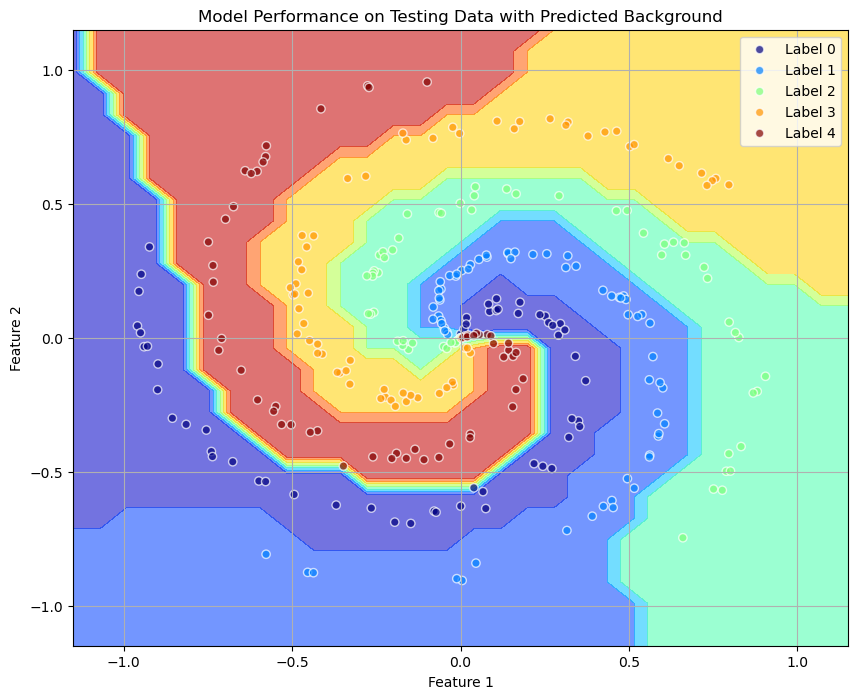

In [267]:
import numpy as np

model.load_state_dict(best_model_weights)

model.cpu()

x,y=np.meshgrid(np.linspace(-1.15,1.15,30),np.linspace(-1.15,1.15,30))
xy=np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
z=model(torch.tensor(xy).float()).detach().numpy()
z=np.argmax(z,1).reshape(30,30)

# Define a normalization based on label values
norm = plt.Normalize(test_data['label'].min(), test_data['label'].max())

# Generate the visualization of the predictions
plt.figure(figsize=(10, 8))
plt.contourf(x, y, z, cmap="jet", alpha=0.55, norm=norm)

# Overlay scatter plot with the true labels
for label in sorted(test_data['label'].unique()):
    subset = test_data[test_data['label'] == label]
    plt.scatter(subset['feature1'], subset['feature2'], label=f'Label {int(label)}', norm=norm, 
                c=subset['label'], cmap="jet",alpha=0.7, edgecolors='w')

# Add legend and text
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-1.15, 1.15)
plt.ylim(-1.15, 1.15)
plt.title("Model Performance on Testing Data with Predicted Background")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

- The background colors represent the regions where the model predicts a certain label.
- The overlaid scatter points represent the training data, colored by their true labels.  

From the visualization, we can observe that the model has done a fairly good job of classifying most data points correctly. The decision boundaries drawn by the model seem to align well with the clusters of the training data. There might be minor misclassifications, especially near the boundaries of the clusters, but overall the performance looks satisfactory.